In [60]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd

In [24]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [26]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurements', 'stations']

In [29]:
# Save references to each table
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

## Precipitation Analysis

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
# 2017-07-02

# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2017-07-02').\
    order_by(Measurement.date).all()
year_prcp

[('2017-07-03', 0.04),
 ('2017-07-03', 0.13),
 ('2017-07-03', 0.0),
 ('2017-07-03', 0.0),
 ('2017-07-03', 0.02),
 ('2017-07-03', 0.15),
 ('2017-07-03', 0.4),
 ('2017-07-04', 0.04),
 ('2017-07-04', 0.03),
 ('2017-07-04', 0.08),
 ('2017-07-04', 0.0),
 ('2017-07-05', 0.0),
 ('2017-07-05', 0.0),
 ('2017-07-05', 0.0),
 ('2017-07-05', 0.0),
 ('2017-07-05', 0.0),
 ('2017-07-05', 0.0),
 ('2017-07-05', 0.0),
 ('2017-07-06', 0.0),
 ('2017-07-06', 0.0),
 ('2017-07-06', 0.0),
 ('2017-07-06', 0.0),
 ('2017-07-06', 0.0),
 ('2017-07-06', 0.02),
 ('2017-07-07', 0.0),
 ('2017-07-07', 0.02),
 ('2017-07-07', 0.0),
 ('2017-07-07', 0.0),
 ('2017-07-07', 0.0),
 ('2017-07-07', 0.18),
 ('2017-07-07', 0.3),
 ('2017-07-08', 0.0),
 ('2017-07-08', 0.02),
 ('2017-07-08', 0.06),
 ('2017-07-08', 0.0),
 ('2017-07-08', 0.0),
 ('2017-07-08', 0.02),
 ('2017-07-09', 0.0),
 ('2017-07-09', 0.09),
 ('2017-07-09', 0.0),
 ('2017-07-09', 0.0),
 ('2017-07-09', 0.11),
 ('2017-07-09', 0.0),
 ('2017-07-10', 0.0),
 ('2017-07-10', 0

In [32]:
# Save the query results as a Pandas DataFrame 
year_prcp_df = pd.DataFrame(year_prcp, columns=['date', 'precipitation'])
year_prcp_df.head()

,date,precipitation
0,2017-07-03,0.04
1,2017-07-03,0.13
2,2017-07-03,0.00
3,2017-07-03,0.00
4,2017-07-03,0.02


In [33]:
# Sort the dataframe by date
year_prcp_df = year_prcp_df.sort_values("date")
year_prcp_df.head(10)

,date,precipitation
0,2017-07-03,0.04
1,2017-07-03,0.13
2,2017-07-03,0.00
3,2017-07-03,0.00
4,2017-07-03,0.02
5,2017-07-03,0.15
6,2017-07-03,0.40
7,2017-07-04,0.04
8,2017-07-04,0.03
9,2017-07-04,0.08


In [34]:
# Set the index to the date column
year_prcp_df.set_index('date', inplace=True)
year_prcp_df.head()

,precipitation
date,
2017-07-03,0.04
2017-07-03,0.13
2017-07-03,0.00
2017-07-03,0.00
2017-07-03,0.02


### Graph shows yearly precipitation pattern

<IPython.core.display.Javascript object>


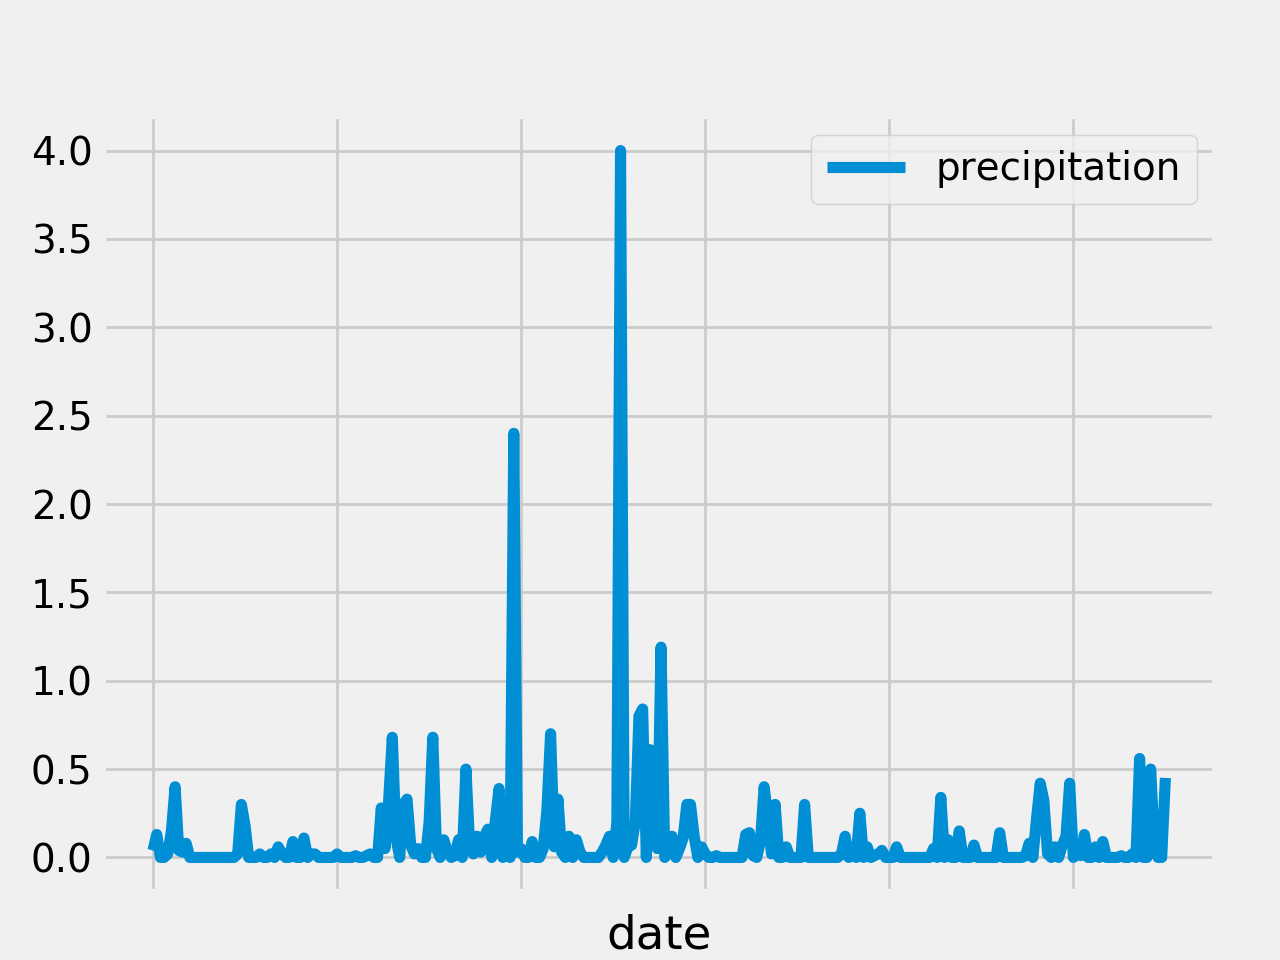

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
year_prcp_df.plot()
plt.show()

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_prcp_df.describe()

,precipitation
count,276.000000
mean,0.101159
std,0.317742
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,4.000000


## Station Analysis

In [37]:
# How many stations are available in this dataset?
stations = session.query(func.count(Station.id)).scalar()
print(stations)

9


In [45]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station

sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
active_station = session.query(*sel).\
    filter(Measurement.station == "USC00519281")\
    .all()
active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [80]:
# Choose the station with the highest number of temperature observations.
# USC00519281
# Query the last 12 months of temperature observation data for this station  
year_tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2017-07-02').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()
year_tobs

[('2017-07-03', 76.0),
 ('2017-07-04', 78.0),
 ('2017-07-05', 77.0),
 ('2017-07-06', 74.0),
 ('2017-07-07', 75.0),
 ('2017-07-08', 78.0),
 ('2017-07-09', 78.0),
 ('2017-07-10', 69.0),
 ('2017-07-11', 72.0),
 ('2017-07-12', 74.0),
 ('2017-07-13', 74.0),
 ('2017-07-14', 76.0),
 ('2017-07-15', 80.0),
 ('2017-07-16', 80.0),
 ('2017-07-17', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-19', 76.0),
 ('2017-07-20', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-22', 77.0),
 ('2017-07-23', 82.0),
 ('2017-07-24', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-26', 75.0),
 ('2017-07-27', 76.0),
 ('2017-07-28', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-30', 81.0),
 ('2017-07-31', 76.0),
 ('2017-08-04', 77.0),
 ('2017-08-05', 82.0),
 ('2017-08-06', 83.0),
 ('2017-08-13', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-15', 77.0),
 ('2017-08-16', 76.0),
 ('2017-08-17', 76.0),
 ('2017-08-18', 79.0)]

In [83]:
# Save the query results as a Pandas DataFrame 
year_tobs_df = pd.DataFrame(year_tobs, columns=['date', 'tobs'])

### Graph shows yearly frequency of temperature patterns

<IPython.core.display.Javascript object>


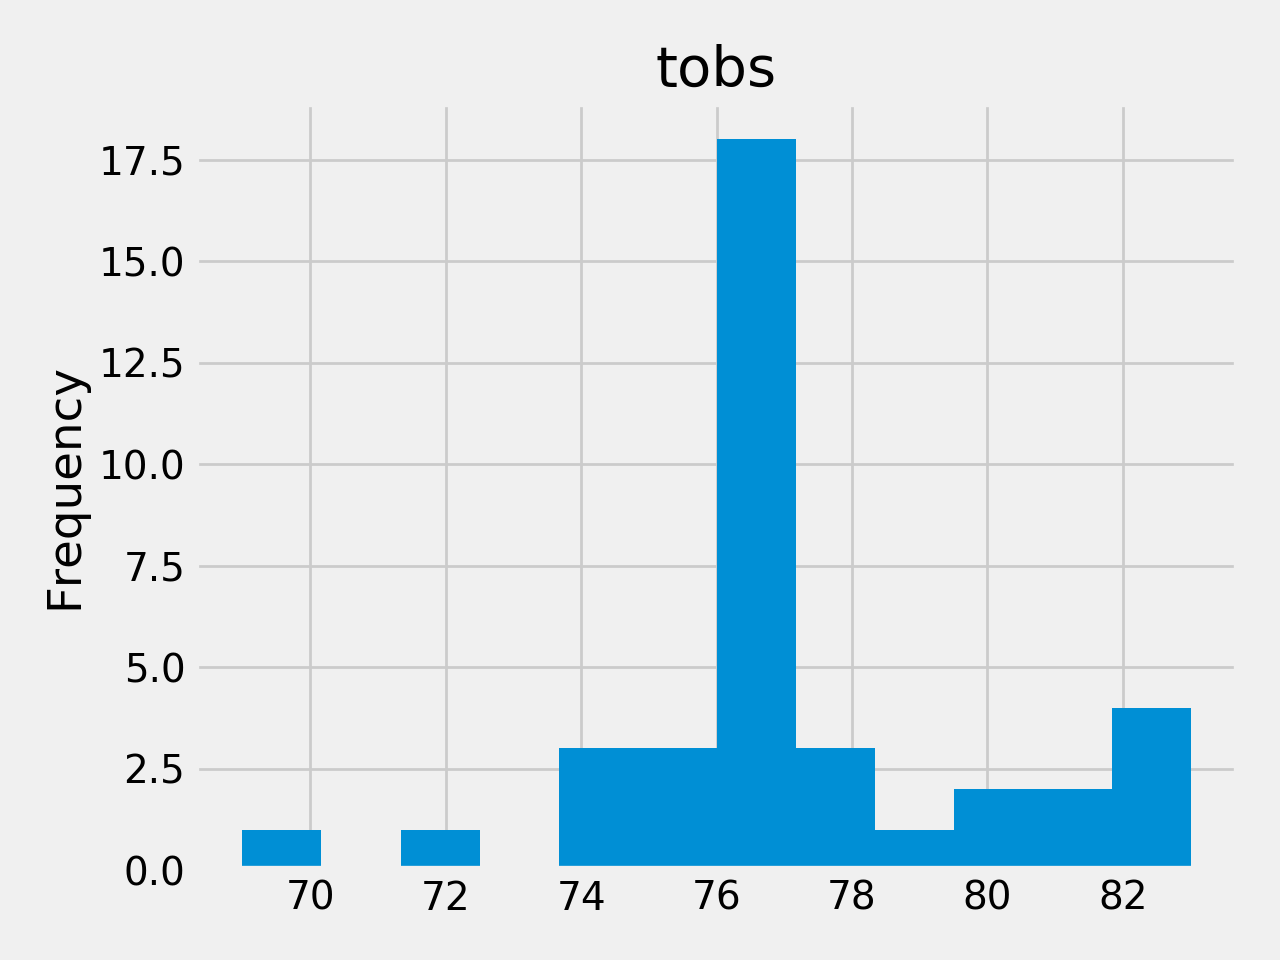

In [111]:
# Plot the results as a histogram

year_tobs_df.hist(bins=12)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()